In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Import CSV data as Pandas dataframe

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
# Show top 5 records
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Shape of dataset (rows, col)
df.shape

(1000, 8)

# Datainfo
    - gender: sex of student
    - race/ ethniticity
    - parental eduction
    - lunch
    - test preparation
    - math score
    - reading score
    - writin score

# Data checks to preform
    - missing values
    - duplicates
    - data type
    - number of unique values of each col
    - statistics of dataset
    - various catergories present in different categorical column
    

In [5]:
# check missing values
df.isna().sum() 

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There is no missing values in the dataset

In [6]:
# Check duplicates
df.duplicated().sum()

0

There is no duplicates values in the dataset


In [7]:
# Check Null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
# Check number of unique values of each column
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
# Check statistics of dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Insights:
    - All mean are very close to each other between 66 to 68
    - All std dev are close between 14 to 16
    - Mini score varies greatly

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
# Exploring data
print("Catergories in 'gender' vaiable : {}".format(df['gender'].nunique()), end=" ")
print(df['gender'].unique())

print("Catergories in 'ethinicity' vaiable : {}".format(df['race_ethnicity'].nunique()), end=" ")
print(df['race_ethnicity'].unique())

print("Catergories in 'parental level education' vaiable : {}".format(df['parental_level_of_education'].nunique()), end=" ")
print(df['parental_level_of_education'].unique())

print("Catergories in 'lunch' vaiable : {}".format(df['lunch'].nunique()), end=" ")
print(df['lunch'].unique())

print("Catergories in 'test preparation course' vaiable : {}".format(df['test_preparation_course'].nunique()), end=" ")
print(df['test_preparation_course'].unique())

Catergories in 'gender' vaiable : 2 ['female' 'male']
Catergories in 'ethinicity' vaiable : 5 ['group B' 'group C' 'group A' 'group D' 'group E']
Catergories in 'parental level education' vaiable : 6 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Catergories in 'lunch' vaiable : 2 ['standard' 'free/reduced']
Catergories in 'test preparation course' vaiable : 2 ['none' 'completed']


In [12]:
# Define numerical & catergorical columns using list comprehension
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print
print('We have {} numerical feature : {}'.format(len(numeric_feature), numeric_feature))
print('We have {} catergorical feature : {}'.format(len(categorical_feature), categorical_feature))



We have 3 numerical feature : ['math_score', 'reading_score', 'writing_score']
We have 5 catergorical feature : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [14]:
# Adding columns for "Total score" and "Average"
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3


In [15]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


In [16]:
reading_full = df[df['reading_score']==100]['average'].count()
writing_full = df[df['writing_score']==100]['average'].count()
math_full = df[df['math_score']==100]['average'].count()

print(f'Number of students with full marks in Math: {math_full}')
print(f'Number of students with full marks in reading:  {reading_full}')
print(f'Number of students with full marks in writing:  {writing_full}')

Number of students with full marks in Math: 7
Number of students with full marks in reading:  17
Number of students with full marks in writing:  14


In [17]:
reading_less_20 = df[df['reading_score']<=20]['average'].count()
writing_less_20 = df[df['writing_score']<=20]['average'].count()
math_less_20 = df[df['math_score']<=20]['average'].count()

print(f'Number of students with less than 20 marks in reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in writing:  {writing_less_20}')
print(f'Number of students with less than 20 marks in maths:  {math_less_20}')

Number of students with less than 20 marks in reading: 1
Number of students with less than 20 marks in writing:  3
Number of students with less than 20 marks in maths:  4


# Insights:
    - students perform poor in maths
    - Best performance in reading

# Exploring data and visualization

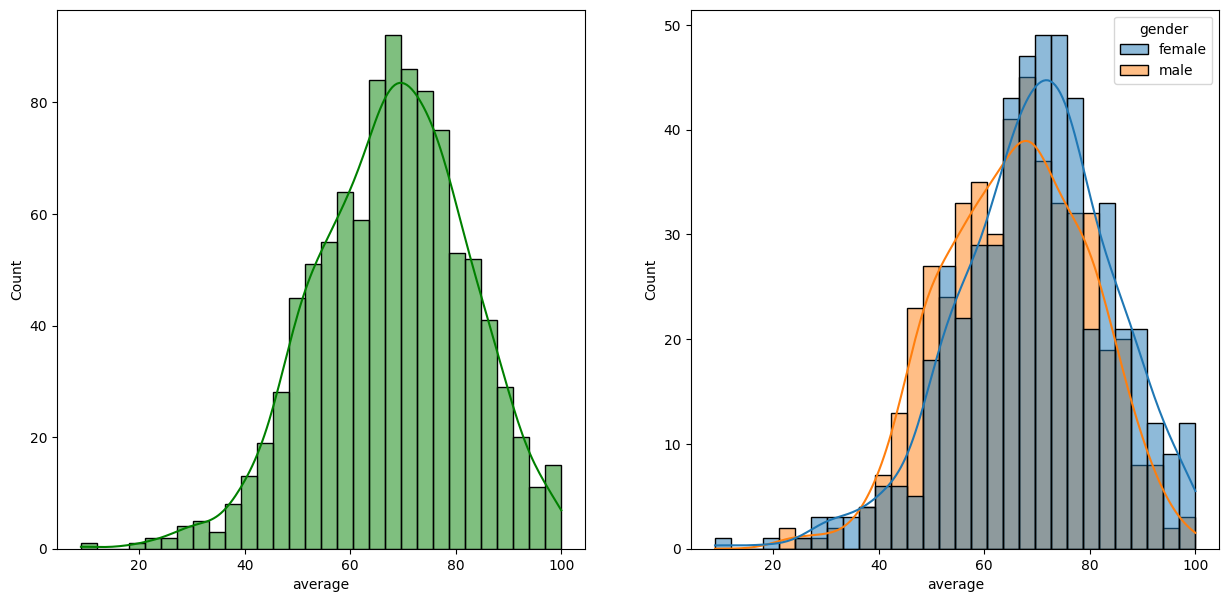

In [18]:
#  With respect to average score
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins = 30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', bins = 30, kde=True, hue='gender')
plt.show()


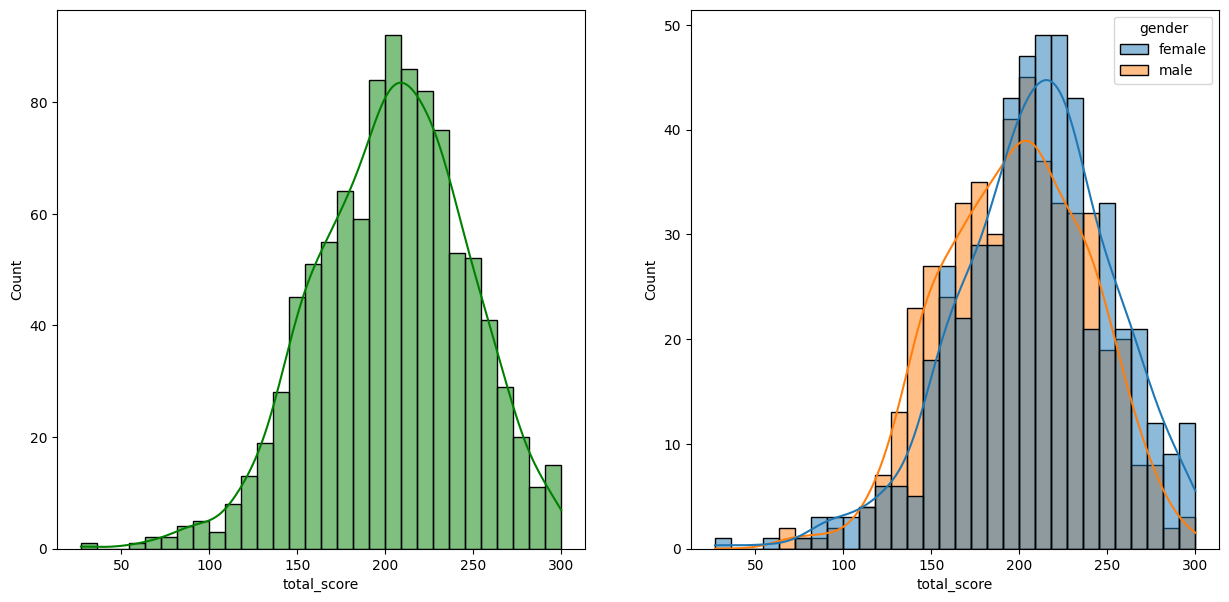

In [19]:
# With respect to total score
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins = 30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', bins = 30, kde=True, hue='gender')
plt.show()


# Insights:
    - Female perform better

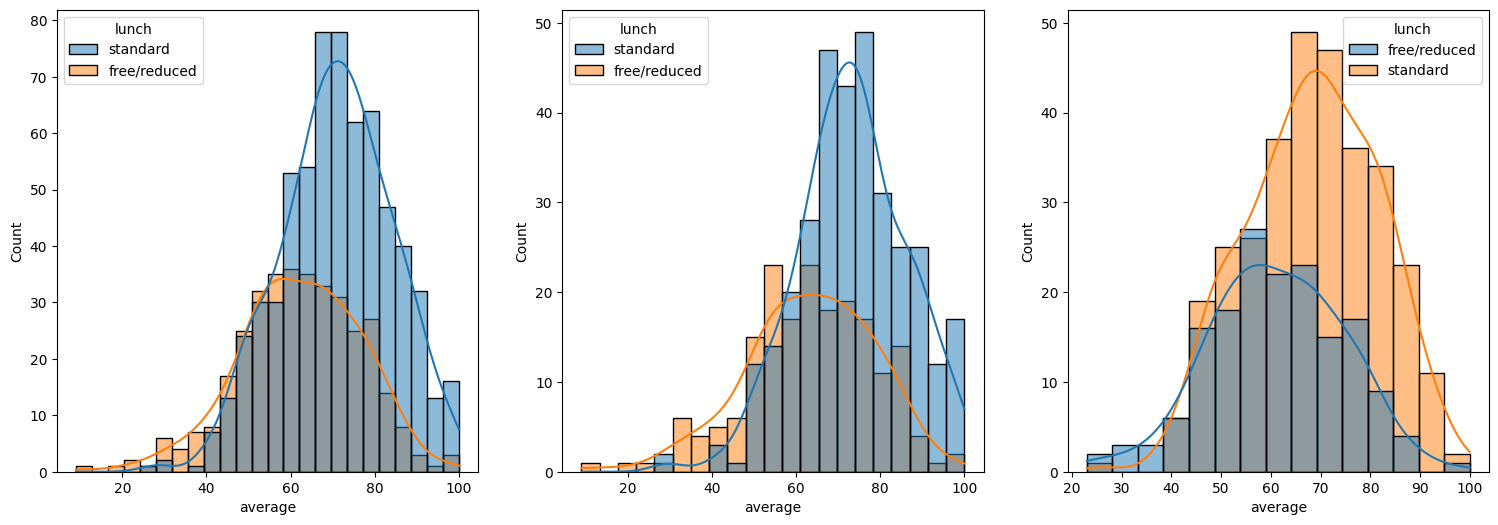

In [20]:
fig, axs = plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.show()


# Insights:
    - standard lunch helps perform well
    - helps male and female equally

In [21]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


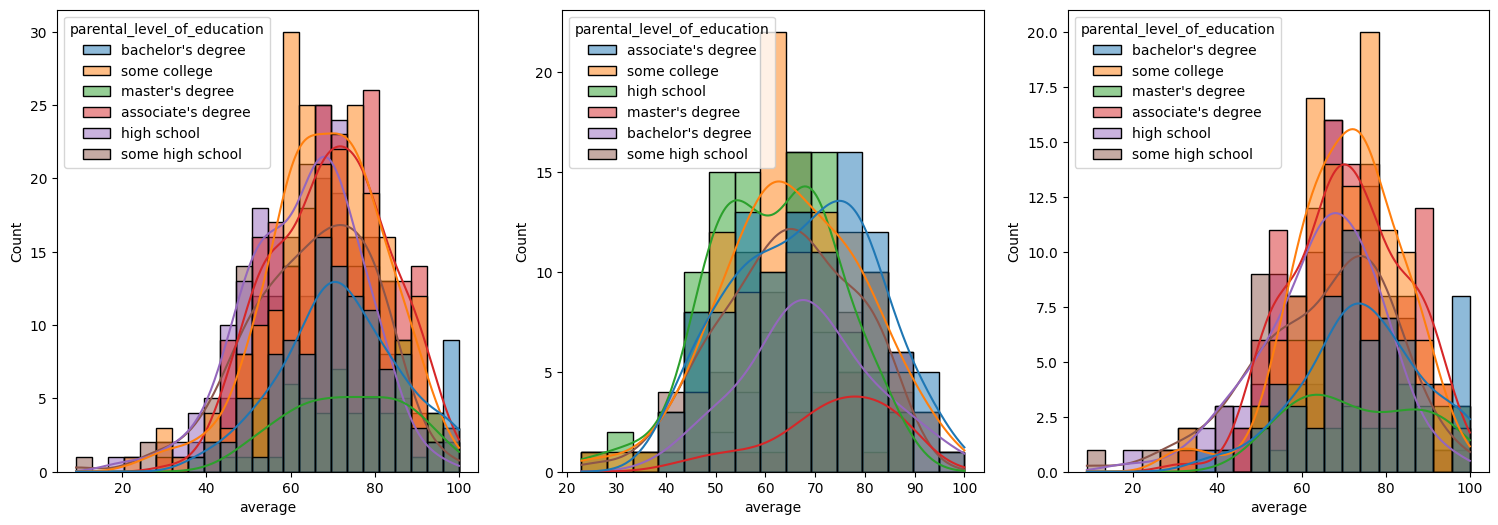

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

# Insights
    - In general parent's education don't help student perform well in exam.
    - 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
    - 3rd plot we can see there is no effect of parent's education on female students.


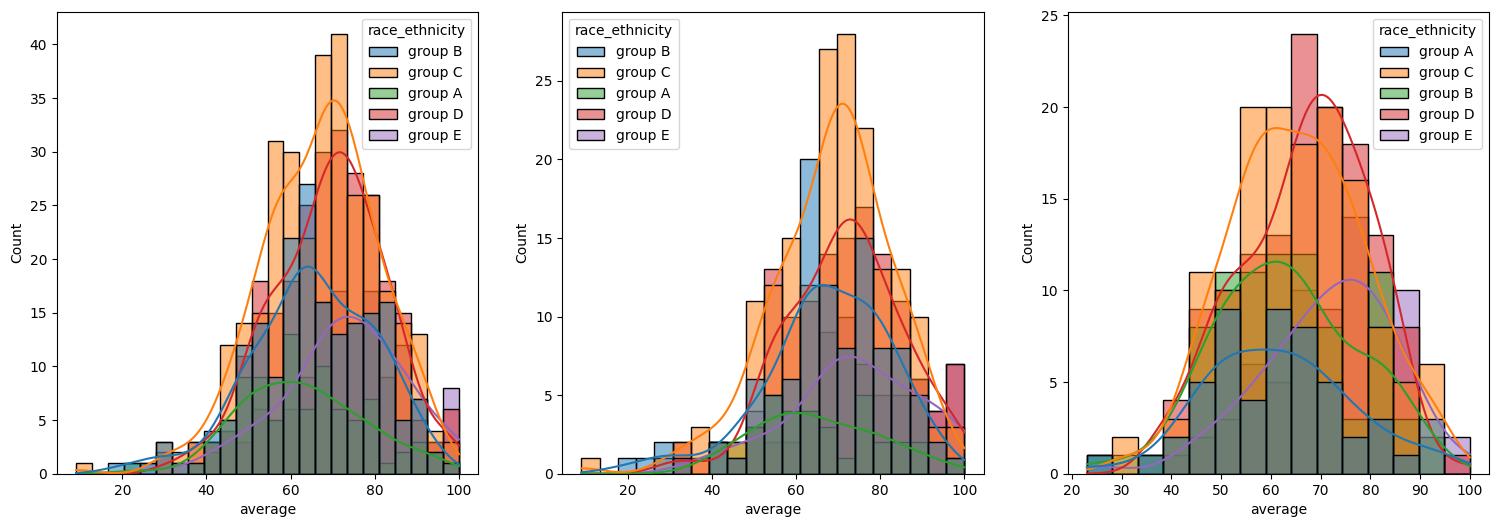

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

# Insights
    - Students of group A and group B tends to perform poorly in exam.
    - Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or 

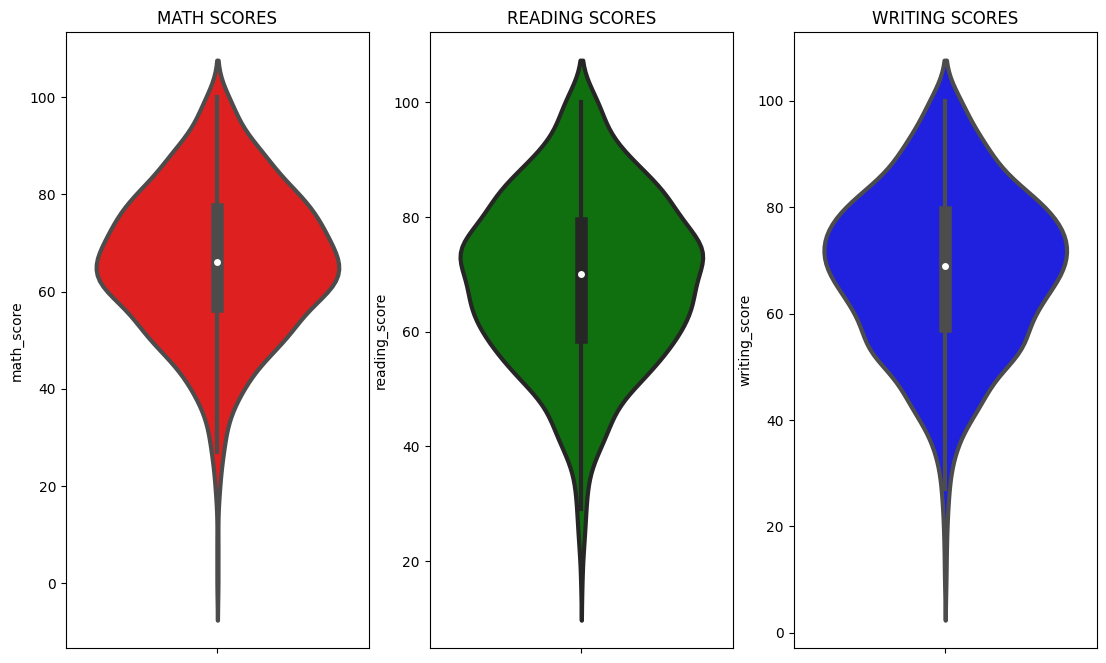

In [24]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

# Multi-Variate analysis

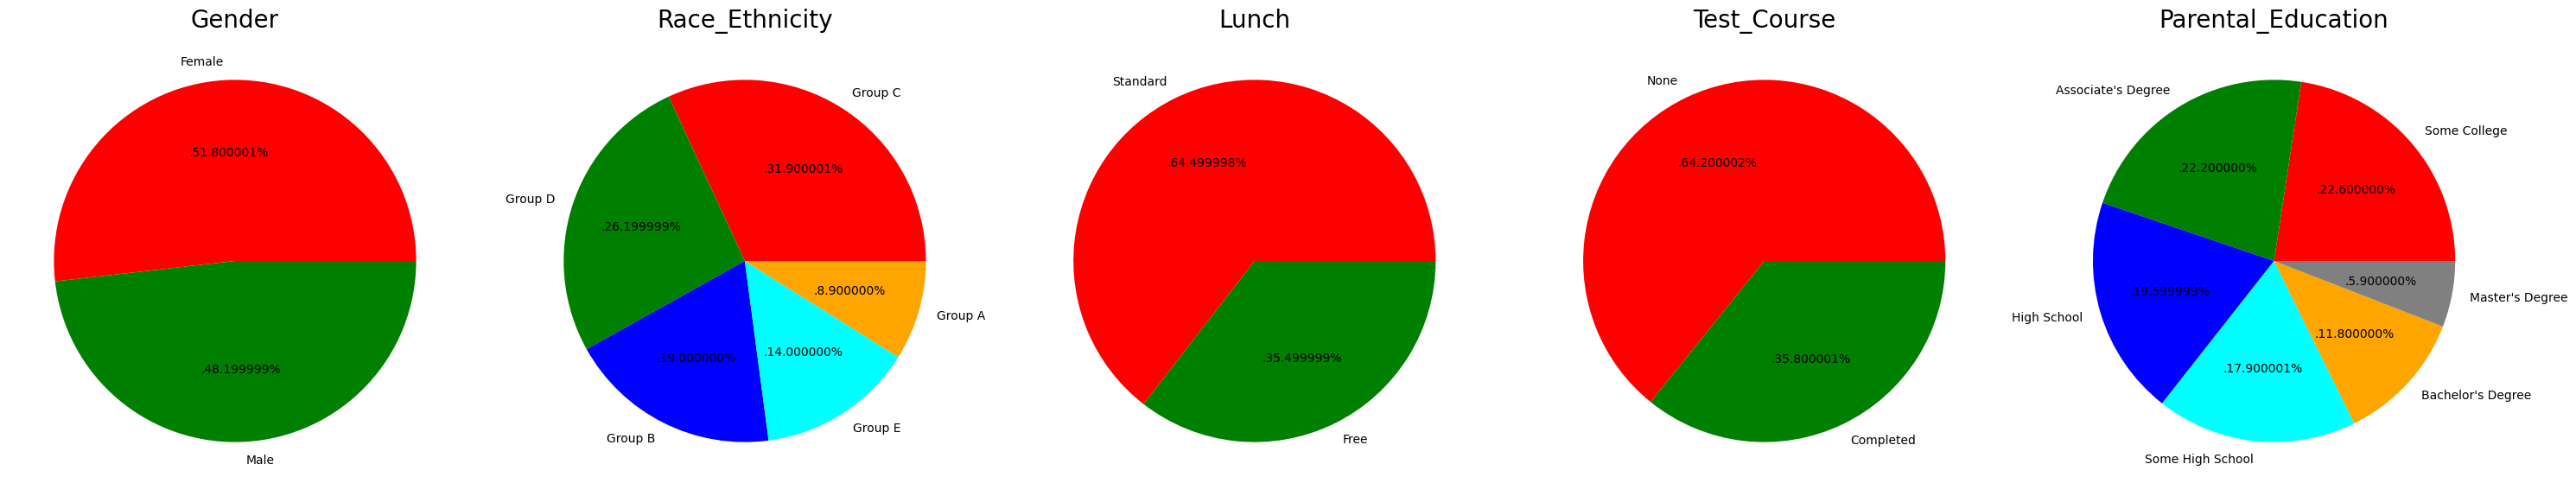

In [25]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test_Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

# Insights
    - Number of Male and Female students is almost equal
    - Number students are greatest in Group C
    - Number of students who have standard lunch are greater
    - Number of students who have not enrolled in any test preparation course is greater
    - Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

# Feature wise visualization

## Gender column:
    How is distribution of Gender ?
    Is gender has any impact on student's performance ?

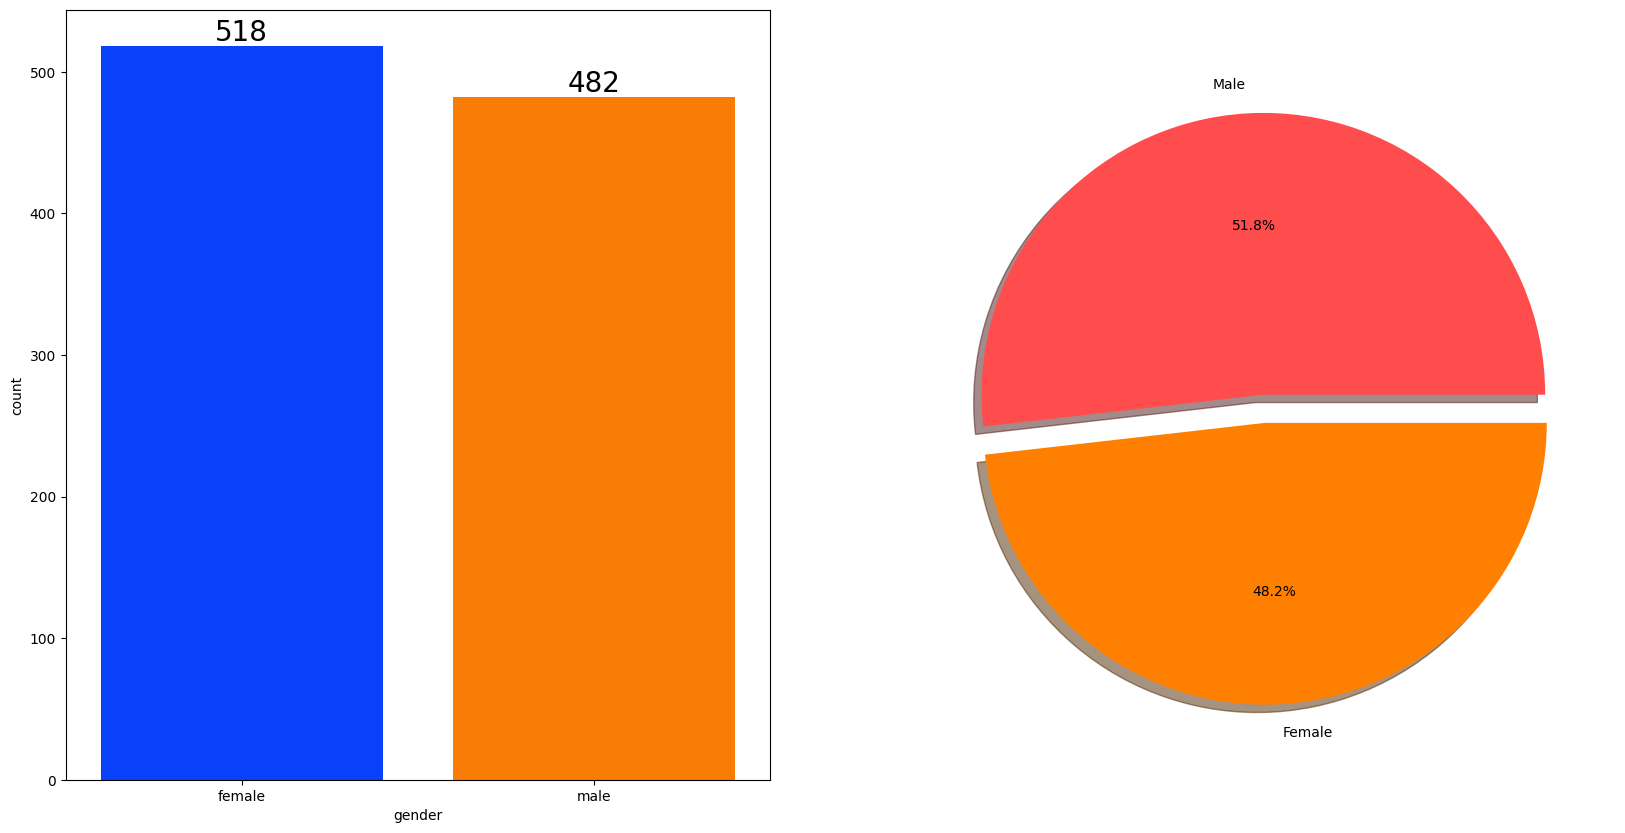

In [26]:
# UNIVARIATE ANALYSIS ( How is distribution of Gender ? )
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

# Insights
    Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

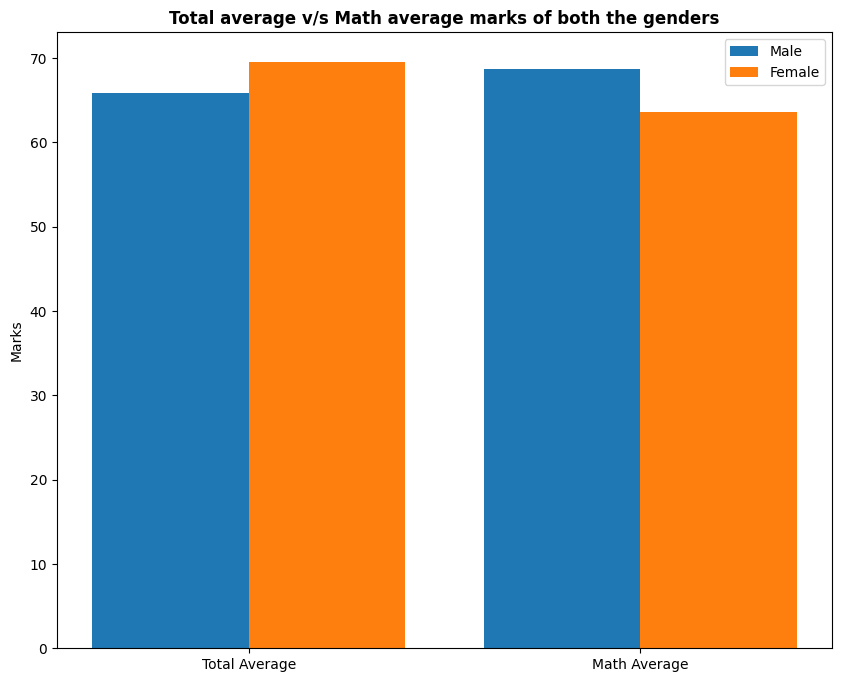

In [27]:
# BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )
gender_group = df.groupby('gender').mean()
gender_group
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

# 4.4.2 RACE/EHNICITY COLUMN
    How is Group wise distribution ?
    Is Race/Ehnicity has any impact on student's performance ?
    UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

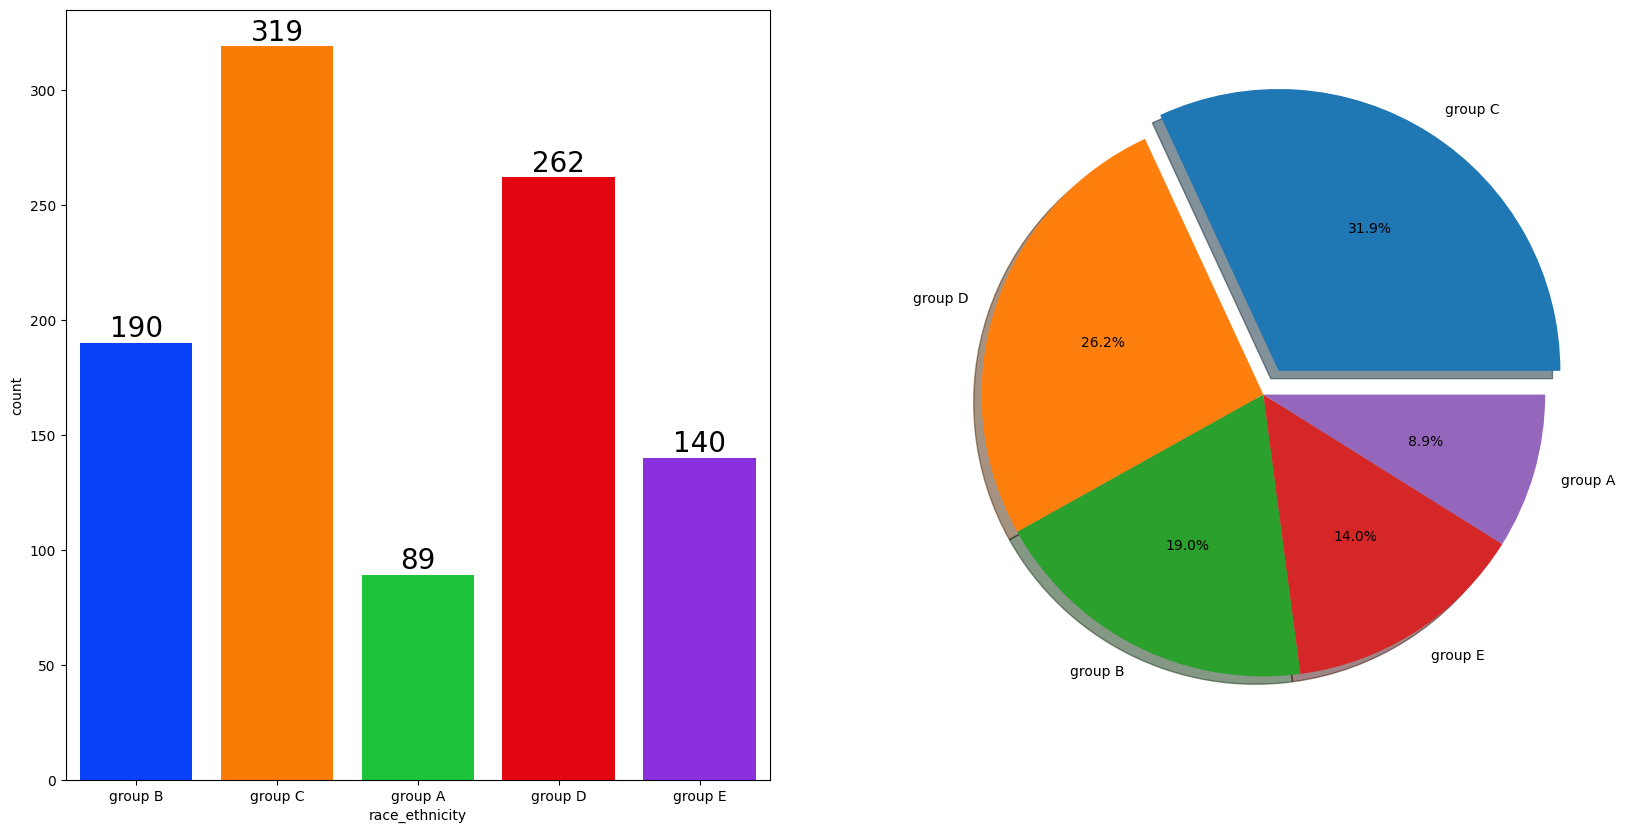

In [28]:

f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   
# Insights
# Most of the student belonging from group C /group D.
# Lowest number of students belong to groupA.


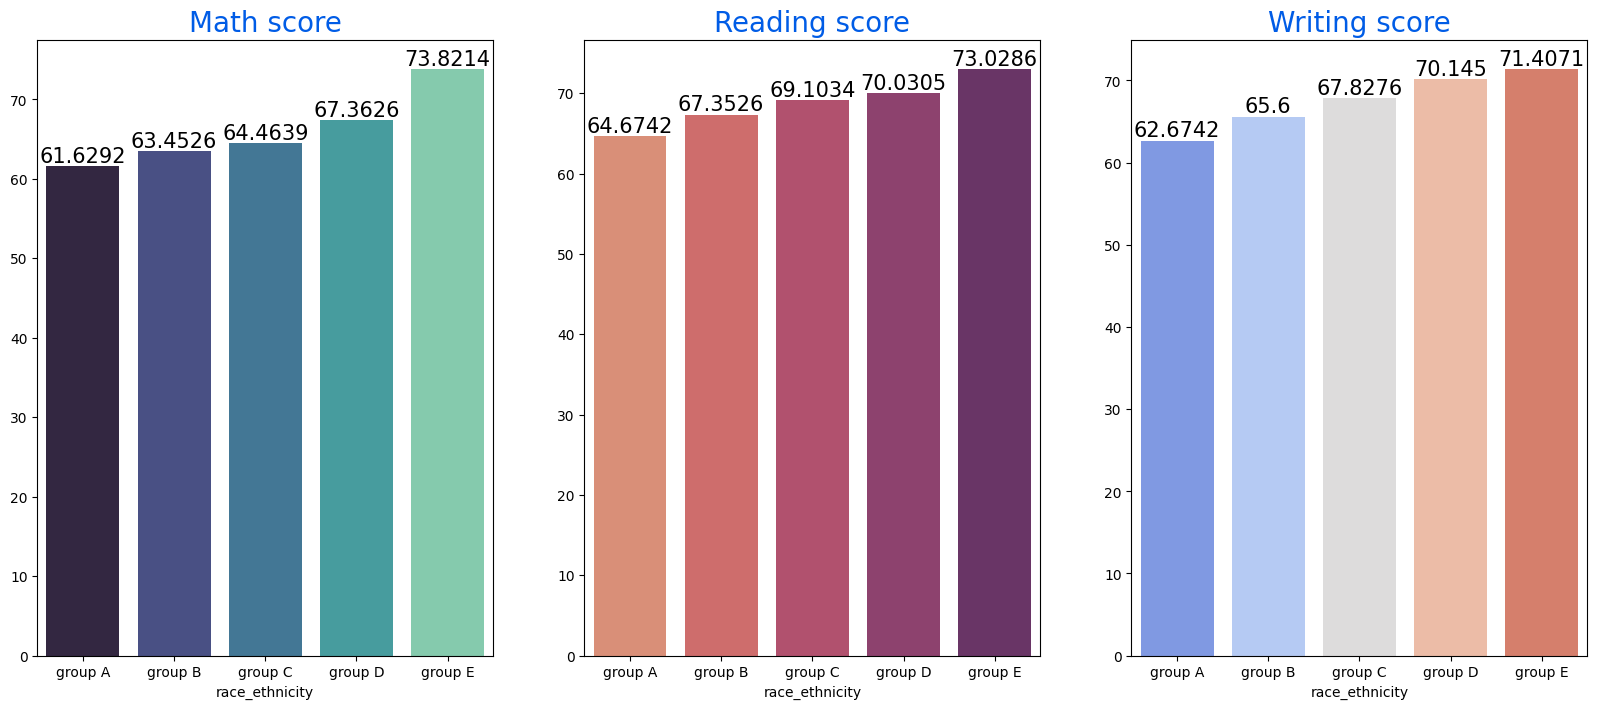

In [29]:
# BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)
# Insights
# Group E students have scored the highest marks.
# Group A students have scored the lowest marks.
# Students from a lower Socioeconomic status have a lower avg in all course subjects

<AxesSubplot:xlabel='lunch', ylabel='writing_score'>

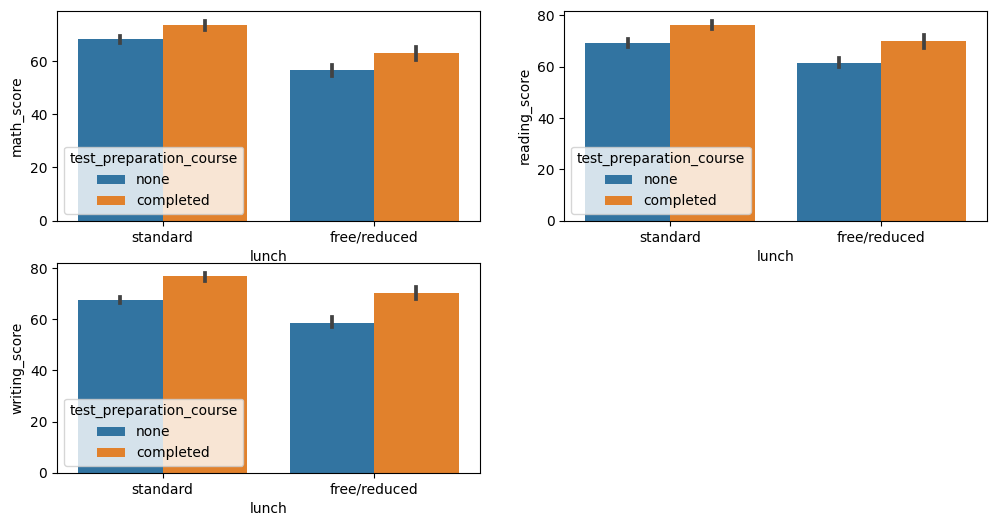

In [30]:
# Test preparation course
# 4.4.5 TEST PREPARATION COURSE COLUMN
# Which type of lunch is most common amoung students ?
# Is Test prepration course has any impact on student's performance ?
# BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

# Insights
    Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

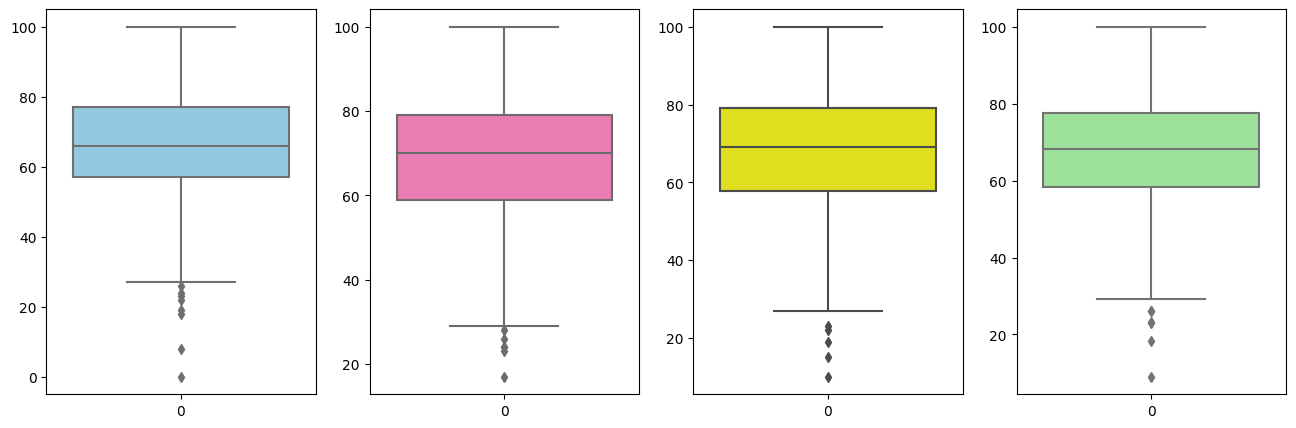

In [31]:
# Check outliers
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

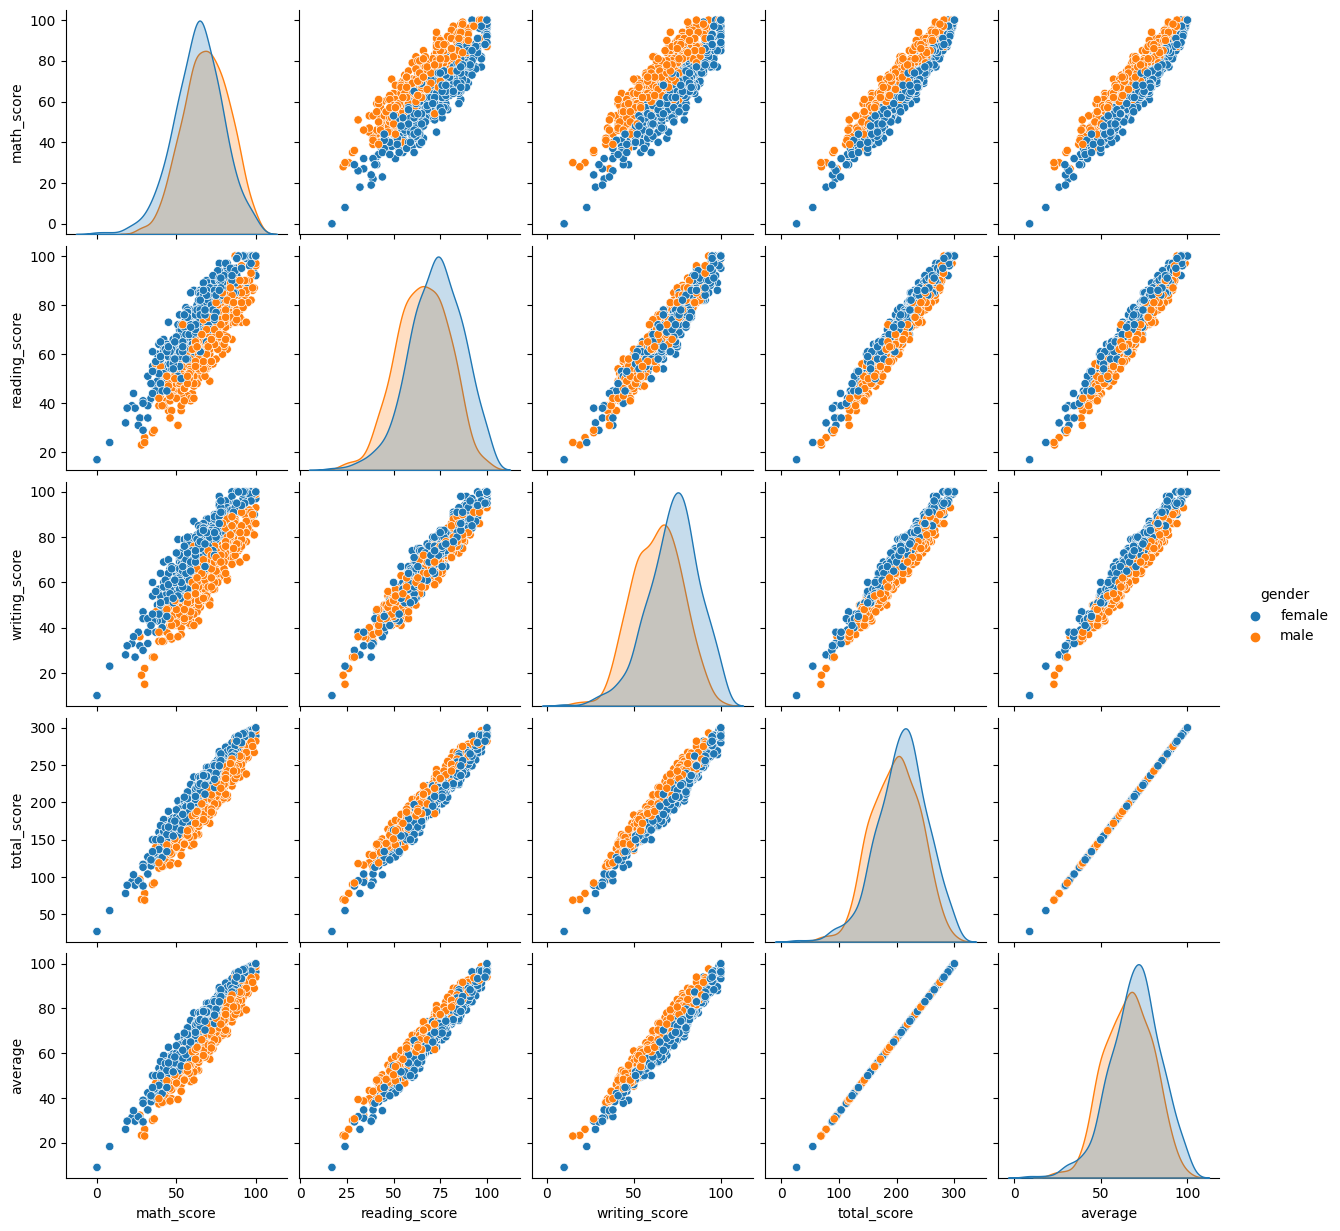

In [32]:
# 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT
sns.pairplot(df,hue = 'gender')
plt.show()

# Conclusions
    Student's Performance is related with lunch, race, parental level education
    Females lead in pass percentage and also are top-scorers
    Student's Performance is not much related with test preparation course
    Finishing preparation course is benefitial.